[-1.62463669 -1.52841621 -1.54672856 -1.50242875 -1.35786415 -1.12513107
 -0.99303347 -0.813844   -0.66669626 -0.53318551 -0.44704697 -0.41129676
 -0.29682386 -0.26143613 -0.29383903 -0.46866055 -0.5892152  -0.6233348
 -0.5846371  -0.52504413 -0.6151334  -0.74212658 -0.65506802 -0.62297786
 -0.64813951 -0.74937066 -0.727514   -0.7602041  -0.89276891 -0.94847556
 -1.00461582 -0.96999352 -1.04018793 -1.24684779 -1.6193925  -1.89494237
 -2.07556111 -2.14451376 -2.01098224 -1.80185456 -1.71193191 -1.59419072
 -1.51785188 -1.44281168 -1.47952886 -1.39463772 -1.33377263 -1.3214472
 -1.31657968 -1.4093189  -1.43341776 -1.45314059 -1.42334468 -1.59527927
 -1.72951201 -1.93329257 -2.27747822 -2.40868566 -2.30213006 -2.06436132
 -1.89621184 -1.83419259 -1.82549516 -2.01857256 -2.07152945 -2.09379835
 -1.98795577]


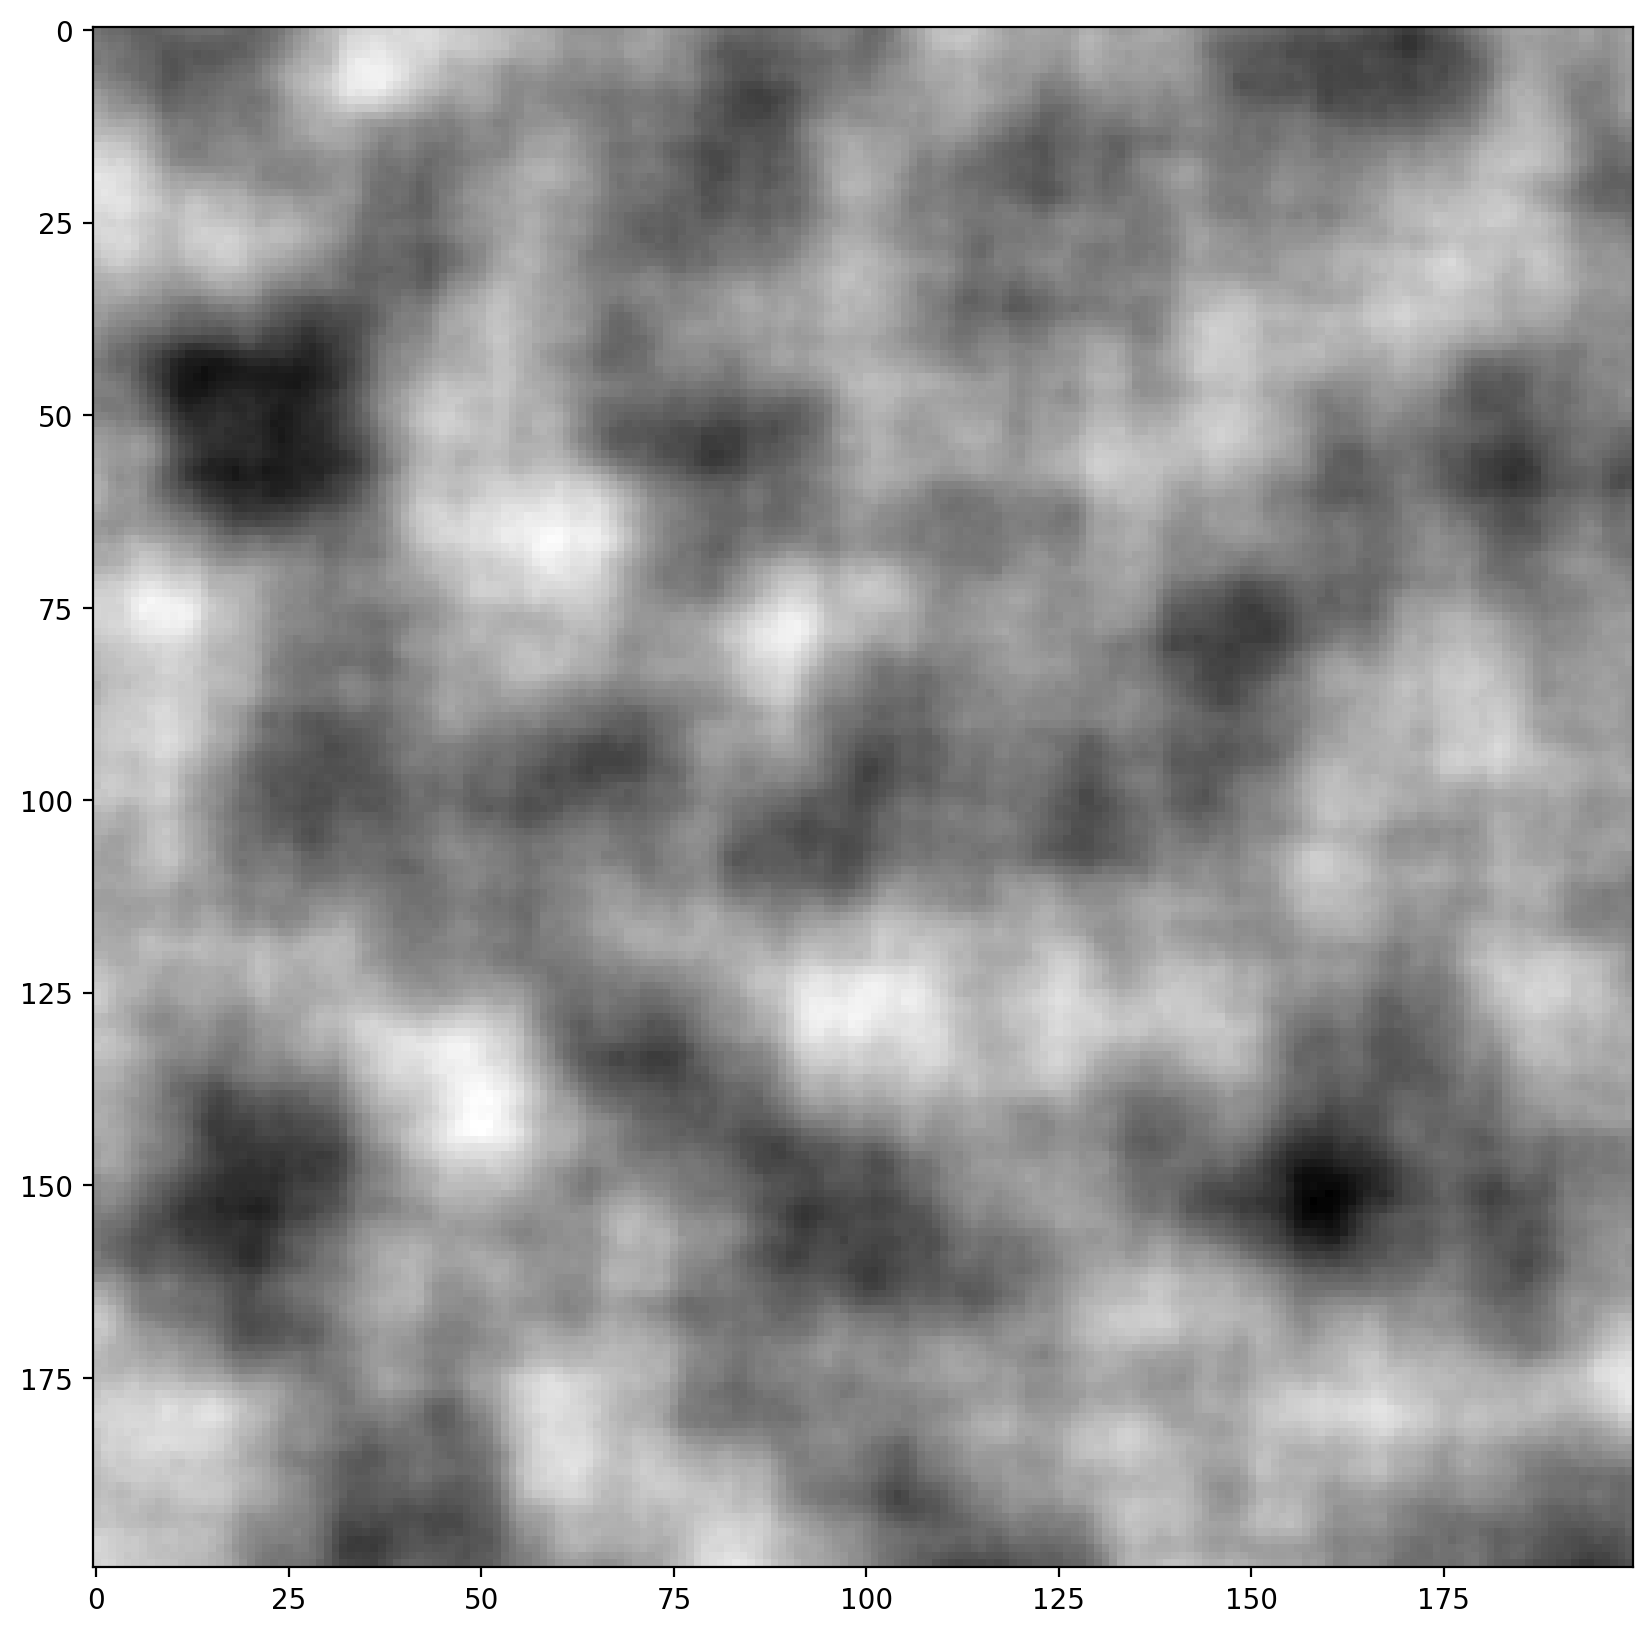

In [7]:
#An approximate fractional Brownian motion sampler which approximates the eigenvalues of the KL transform of
#fractional Brownian motion. Iterating this procedure and interpolating yields a smooth object (!) which can be used for computer-generated
#art since it looks somewhat like smoke evolution.

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import RegularGridInterpolator

n=200
m=100
l=1.1
gain=0.9
X=np.zeros((n,n))
xv=np.linspace(0,4*np.pi,n)
yv=xv
x,y=np.meshgrid(xv,yv)


#fig,axs=plt.subplots(1,m,figsize=(10,15),dpi=200)
for i in range(0,m):
  r = np.random.rand(2)
  r = r / np.linalg.norm(r)
  v=r[0]*x+r[1]*y
  w=-r[1]*x+r[0]*y
  X+=np.power(gain,i)*np.sin(np.power(l,i)*v+np.random.normal())*np.sin(np.power(l,i)*w+np.random.normal())
  #axs[i].imshow(X)

#fbm = interpolate.interp2d(x, y, X, kind='cubic')
fbm= RegularGridInterpolator((xv, yv), X)

q1=fbm((xv[n//3:2*n//3]+2,yv[n//3:2*n//3]-2))
q2=fbm((xv[n//3:2*n//3]-1,yv[n//3:2*n//3]+3))
print(q1)
#plt.imshow(q1,cmap='gray')
#Y=fbm(xv+q1,yv+q2)

fig,ax=plt.subplots(1,figsize=(10,10),dpi=200)
plt.imshow(X,cmap='gray')